<a href="https://colab.research.google.com/github/adhishagc/Genetic-Algorithm-using-Python-Example/blob/master/Genetic_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Table of Contents**

---


1.   **Importing Libraries**
2.   **Access to Google Drive**
3.**Function Definitions**
4. **Running the Model**





### **Initialization**


1.   Import of Libraries
2.   Access to Google Drive
3. Load the Dataset
4. View the Dataset as a Dataframe



In [0]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
from matplotlib import pyplot as plt
import time

In [2]:
#Access to google drive. The Video Store dataset was uploaded to google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#The dataset is load dataset to a dataframe
df = pd.read_csv('/content/gdrive/My Drive/Genetic Algorithms/Assignment 01/dataset.csv')

In [4]:
#view dataset
df

,file,size,duration
0,1,800,121
1,2,700,95
2,3,650,85
3,4,750,100
4,5,600,78
5,6,900,125
6,7,950,130
7,8,875,128
8,9,1050,135
9,10,1500,120


### **Population Creation Function**
A dataframe which consists of the entire population is returned when this function is called. The structure would be of 1 column to label the chromosome number and the remaining 10 columns will represent the file number of the dataset. The returned dataframe (population) will consist of random 0 or 1 values in the  chromosome.

In [0]:
# function for init population
def createInitPop(popSize):
  #array of data to represent the chromosomes and random file labellings
  values ={
    'chromosome':[i for i in range(1,popSize+1)],
    'file 1':[random.randint(0, 1) for _ in range(popSize)],
    'file 2':[random.randint(0, 1) for _ in range(popSize)],
    'file 3':[random.randint(0, 1) for _ in range(popSize)],
    'file 4':[random.randint(0, 1) for _ in range(popSize)],
    'file 5':[random.randint(0, 1) for _ in range(popSize)],
    'file 6':[random.randint(0, 1) for _ in range(popSize)],
    'file 7':[random.randint(0, 1) for _ in range(popSize)],
    'file 8':[random.randint(0, 1) for _ in range(popSize)],
    'file 9':[random.randint(0, 1) for _ in range(popSize)],
    'file 10':[random.randint(0, 1) for _ in range(popSize)],
  }
  #convert the array of population to a dataframe
  values = pd.DataFrame(values)
  
  #return the dataframe
  return values

### **Evaluate Fitness Function**

\begin{equation}
f(x_i) = \textrm{Playing time of video file of } x_i
\end{equation}

\begin{equation}
g(x_i) = \textrm{File size of video file of } x_i
\end{equation}

**Objective Function**
\begin{equation}
\textrm{Maximize }\sum f(x_i) \textrm{ such that } \sum g(x_i)<=4500
\end{equation}

In [0]:
#Evaluate Fitness Function
def EvaluateFitness(chromosome,df,popSize):
  #fitness array
  fitness = {
      'chromosome':[x for x in range(1,popSize+1)],
      'fitness':[0 for x in range(0,popSize)]
  }
  
  #size array
  filesize = {
      'chromosome':[x for x in range(1,popSize+1)],
      'size':[0 for x in range(0,popSize)]
  }

  #convert to dataframe
  fitness = pd.DataFrame(fitness)
  filesize = pd.DataFrame(filesize)

  #total file size and duration PER Solution
  size=0
  duration=0
  
  #implementation of the Fitness Function
  # i navigates the rows while the j navigates the file1, file2 ... columns in the chromosome.
  for i in range(popSize):
    for j in range(1,11):
      #navigate through each chromosome in the population and check for the cells which contains a file, that is 1 value in the cell.
      
      if(chromosome.iloc[i,j] ==1):
        #if it contains any file in the cell(that is a 1 value) the size and the duration of the solution is calculated by comparing the dataset.
        size += df.iloc[j-1,1]
        duration +=df.iloc[j-1,2]
    
    #calculation of the fitness and the total file size of the entire population
    if(size<=4500):
      #these values are potential solutions since the size is less than 4500.
      #respective fitness and filesizes are added to the dataframe
      fitness.loc[i,'fitness'] = duration
      filesize.loc[i,'size'] = size
      
    else:
      #These will be non solutions. Therefore the fitness is reduced by multiplying by 0.5
      #The file size is stored
      fitness.loc[i,'fitness'] = duration*0.5
      filesize.loc[i,'size'] = size
      
    #The PER solution size and duration values are reset
    size = 0
    duration = 0
    #Debug_fitness = fitness
  #The entire fitness and filesize of the population is returned as a DataFrame
  return fitness, filesize      

In [0]:
Debug_fitness = pd.DataFrame()

In [0]:
popSize = 60 

#creation of population of Chromosomes
chromosome = createInitPop(popSize)
fitness, totFileSize = EvaluateFitness(chromosome,df,popSize)

In [9]:
fitness

,chromosome,fitness
0,1,216.0
1,2,293.0
2,3,451.0
3,4,350.0
4,5,382.0
5,6,215.0
6,7,367.0
7,8,274.0
8,9,503.0
9,10,285.0


In [0]:
fitness_id = fitness[['fitness']].idxmax()
highest_fitness = fitness.iloc[fitness_id[0]]

In [11]:
highest_fitness[1]

585.0

### **Rank Selection Function**

In [0]:
#Rank Selection Function
def rankSelection(chromosome,fitness,popSize):
  #Total integer value from 0 to population size 
  #rankTotal = sum(x for x in range(popSize))
  rankTotal = 0
  for x in range(popSize):
    rankTotal += x
    
  #A random value inbetween 0 and above value
  totRandom = random.uniform(0,1)*rankTotal
  
  #variable to store the accumilation of fitness values
  tot=0
  #sorting the fitness dataframe having the lowest on the top and the highest in the bottom
  fitness_sorted = fitness.sort_values(by=['fitness'])
  
  for i in fitness_sorted.index:
    #accumilation of the fitness values till the accumilation is equal to the random total generated
    tot += fitness_sorted.loc[i,'fitness']
    if(tot>=totRandom):
      global fifo_index
      fifo_index = i
      
      #returning the chromosome(as a parent selected) and the respective value i where the accumilation stopped. 
      selected_parent = chromosome.loc[i,:]
      selected_parent_id = i
      
      return selected_parent,selected_parent_id

In [0]:
#Roulette Wheel Function
def Roulette_wheel(chromosome,fitness,popSize):
  #Total integer value from 0 to population size 
  #rankTotal = sum(x for x in range(popSize))
  #rankTotal = 0
  sum_of_fitness = 0
  for i in range(popSize):
    sum_of_fitness += fitness.loc[i,'fitness']
    
  #A random value inbetween 0 and above value
  totRandom = random.uniform(0,sum_of_fitness)
  
  #variable to store the accumilation of fitness values
  tot=0
  #sorting the fitness dataframe having the lowest on the top and the highest in the bottom
  #fitness_sorted = fitness.sort_values(by=['fitness'])
  
  for i in fitness.index:
    #accumilation of the fitness values till the accumilation is equal to the random total generated
    tot += fitness.loc[i,'fitness']
    if(tot>=totRandom):
      global fifo_index
      fifo_index = i
      
      #returning the chromosome(as a parent selected) and the respective value i where the accumilation stopped. 
      selected_parent = chromosome.loc[i,:]
      selected_parent_id = i
      
      return selected_parent,selected_parent_id

In [0]:
def tournament_selection(chromosome,fitness,popSize):
  #count the loop
  count = 1
  #needed offspring count
  offspring_needed = 1
  
  
  #NEEDs modification. This function should be able to hold needed number of parents. But only for the questions purpose 
  #only 1 parent is selected
  selected_parent = pd.DataFrame()
  selected_parent_id = -1

  while(count <= offspring_needed):
    rand_id_1 = random.randint(0,popSize)
    rand_id_2 = random.randint(0,popSize)
    
    if(fitness.loc[rand_id_1,'fitness'] > fitness.loc[rand_id_2,'fitness']):
      selected_parent = chromosome.loc[rand_id_1,:]
      selected_parent_id = rand_id_1
      count += 1
      
    
    elif (fitness.loc[rand_id_1,'fitness'] < fitness.loc[rand_id_2,'fitness']):
      selected_parent = chromosome.loc[rand_id_2,:]
      selected_parent_id = rand_id_2
      count += 1
  
  return selected_parent,selected_parent_id
  
 

### **Binary Represented N Point Crossover Function Generalized**
The function has generalized the Single Point Crossover and the N-Point Crossover operators.
When :
\begin{equation}
n = 1...n \textrm{ which is the n-point}
\end{equation}
is passed as a parameter it the function it acts as a single point crossover and for the rest as an n point crossover. Also the :
\begin{equation}
p_c = 0.8 \textrm{ or etc, crossover rate}
\end{equation}
would be the crossover rate for the function.


In [0]:
def binary_rep_n_point_crossover(n,parent1,parent2,pc):
  
  parent1_parts = [] #this list contains parent 1 partwise split sections based on the random values generated
  parent2_parts = [] #this list contains parent 2 partwise split sections based on the random values generated
  random_vals = [] #list to store the generated random values
  start_pos = 0 #start position of the spiliting parents
  random_position = start_pos+1 #initial random position
  L_1 = 10-1 # the random value range should be in between 1 to 10-1 which is L-1

  parent1_array = parent1.values
  parent2_array = parent2.values

  if(random.uniform(0,1)>=pc):
    #crossover takes place
    count = 1

    for n_times in range(n+1):
      #random position is generated here. This random position will be the place
      #where the chromosome will be split
      random_position = random.randint(random_position,L_1)

      #The generated random values are stored in this list
      random_vals.append(random_position)


      if(n_times == n):
        parent1_parts.append(parent1_array[start_pos:L_1+1])
        parent2_parts.append(parent2_array[start_pos:L_1+1])

      else:

        parent1_parts.append(parent1_array[start_pos:random_position])
        parent2_parts.append(parent2_array[start_pos:random_position])

      start_pos = random_position
      #random_position +=1


    for i in range(len(parent1_parts)):
      if(count%2==0):
        temp = parent1_parts[i]
        parent1_parts[i] = parent2_parts[i]
        parent2_parts[i] = temp
        count +=1
      else:
        #nothing
        count += 1


    offspring1_array = np.concatenate(([parent1_parts[i] for i in range(len(parent1_parts))]))
    offspring2_array = np.concatenate(([parent2_parts[i] for i in range(len(parent1_parts))]))
    return offspring1_array,offspring2_array
  
  else:
    return parent1_array,parent2_array 
  


In [0]:
def uniform_crossover(n,parent1,parent2,p):
  
  parent1_parts = [] #this list contains parent 1 partwise split sections based on the random values generated
  parent2_parts = [] #this list contains parent 2 partwise split sections based on the random values generated
  random_vals = [] #list to store the generated random values
  start_pos = 0 #start position of the spiliting parents
  random_position = start_pos+1 #initial random position
  L_1 = 10-1 # the random value range should be in between 1 to 10-1 which is L-1

  parent1_array = parent1.values
  parent2_array = parent2.values
  offspring1_array = np.empty([len(parent1_array)])
  offspring2_array = np.empty([len(parent1_array)])
  
  #create random array
  rand_array = np.array([random.randint(0, 1) for _ in range(len(parent1_array))])
  
  for i in range(len(parent1_array)):
    if(rand_array[i] < p):
      #inherit from 1st parent
      offspring1_array[i] = parent1_array[i]
      offspring2_array[i] = parent2_array[i]
    else :
      #inherit from 2nd parent
      offspring1_array[i] = parent2_array[i]
      offspring2_array[i] = parent1_array[i]
  
  return offspring1_array,offspring2_array

### **BitFlip of the Mutation**
Bit flip is done based on a randomly generated array of numbers compared with the mutation rate variable. If the compared value is higher than the mutation rate bit value is flipped.
\begin{equation}
p_m = 0 .... 1  \textrm{ Mutation rate Variable}
\end{equation}

In [0]:
def bitflip(chromosome,pm):
  #generate random bit array
  bits = [random.uniform(0,1) for _ in range(10)] #range size is the number of files
  
  for i in range(10):
    if(bits[i]>=pm):
      if(chromosome[i] == 0):
        chromosome[i] = 1
      else:
        chromosome[i] = 0
  
  return chromosome
      

### **Supportive Functions**
These functions are used for retrieving individual chromosome information. Much used for debugging purposes.

1.   **getFitness** function retruns the fitness and the total size of the Chromosome
2.   **getDetails** function returns the total file size and the total duration of the Chromosome



In [0]:
def getFitness(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
  
  if(total_size>4500):
    fitness = total_duration*0.5
    return fitness,total_size
  else:
    fitness = total_duration
    
    return fitness,total_size

In [0]:
def getFitness_for_runs(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
  
  if(total_size>4500):
    fitness = total_duration*0.5
    return fitness,total_duration,total_size
  else:
    fitness = total_duration
    
    return fitness,total_duration,total_size

In [0]:
def getDetails(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
      
  return total_duration, total_size

### **Replace the Offspring with the Population**
Offspring is replaced based on age. That is the selected parents are replaced.



In [0]:
def replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2):
  #Offspring is replaced based on age. That is the selected parents are replaced.
  chromosome.iloc[parent1_id,1:] = offspring1
  chromosome.iloc[parent2_id,1:] = offspring2

### **Iterate the Model**



In [0]:
def trainModel(n,n_point,p_c,p_m):
  #variable to count and display the current epoch
  epoch = 0
  fit = pd.DataFrame()
  filesize = pd.DataFrame()
  parent1 = pd.DataFrame()
  parent2 = pd.DataFrame()
  
  p = 0.5 #this is used only in uniform crossover
  
  for i in range(n):
    #Fitness Evaluation
    
    fitness, totFileSize = EvaluateFitness(chromosome,df,popSize)
    
    #parent selection
    parent1, parent1_id = rankSelection(chromosome,fitness,popSize)
    parent2, parent2_id = rankSelection(chromosome,fitness,popSize)
    
    # Roulette_wheel Selection
    #parent1, parent1_id = Roulette_wheel(chromosome,fitness,popSize)
    #parent2, parent2_id = Roulette_wheel(chromosome,fitness,popSize)
    
    #tournament selection
    #parent1, parent1_id = tournament_selection(chromosome,fitness,popSize)
    #parent2, parent2_id = tournament_selection(chromosome,fitness,popSize)
    
    #offspring generation through crossover
    offspring1,offspring2 = binary_rep_n_point_crossover(n_point,parent1[1:],parent2[1:],p_c)
    
    
    #offspring1,offspring2 = uniform_crossover(n_point,parent1[1:],parent2[1:],p)
    
    #passing the generated offspring for mutation
    offspring1 = bitflip(offspring1,p_m)
    offspring2 = bitflip(offspring2,p_m)
    
    #Using Elitism with FIFO
    
    #Getting the current fittest in the population
    #fitness_only = fitness[['fitness']]
    fitness_id = fitness[['fitness']].idxmax()
    highest_fitness = fitness.iloc[fitness_id[0]]
    #get fitness of generated offspring
    fitness_offspring_1,size = getFitness(offspring1)
    fitness_offspring_2,size = getFitness(offspring2)
    
    if(highest_fitness[1] > fitness_offspring_1):
     offspring1 = chromosome.iloc[fitness_id[0],1:].values
     #print(1)
    elif (highest_fitness[1] > fitness_offspring_2):
     offspring2 = chromosome.iloc[fitness_id[0],1:].values
     #print(2)
    
    
    # UNCOMMENT above if part to avoid Elitism replace parents
    replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2)
    
    #display epoch
    #print(epoch)
    #epoch +=1
    
    #debugging purposes returning values
    fit = fitness
    filesize = totFileSize
    
    #return parent1,parent2,offspring1,offspring2
  #return fit,filesize,parent1,parent2     # general purpose
  #return 


In [0]:
abc = np.array([1,2,3,4,5,6,7,8,9,10])
xxx = chromosome.iloc[39,1:]

In [0]:
abc

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
abc = xxx.values

In [0]:
abc

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [0]:
df3 = pd.DataFrame({"A":[4, 5, 2, 6],  
                   "B":[11, 2, 5, 8], 
                   "C":[1, 8, 66, 4]})

In [0]:
df3

,A,B,C
0,4,11,1
1,5,2,8
2,2,5,66
3,6,8,4


In [0]:
df4 = df3[['A']]

In [0]:
df4.idxmax(axis=0)

A    3
dtype: int64

### **Run the Program**

In [0]:
#SCENE 01
#population size
popSize = 50 

#creation of population of Chromosomes
chromosome = createInitPop(popSize)

#fifo index relates to the index to be removed. -1 is the initial value
fifo_index = -1

#iteration and 
iterations = 100

#n point for crossover
n_point = 1
#crossover rate
p_c = 0.8
#mutation rate
p_m = 0.01

#Final population Duration and Size storage
finalFitness = []
finalDuration = []
finalSize = []


#train model
start = time.time()
#fit,filesize,parent1,parent2 = trainModel(iterations,n_point,p_c,p_m)
trainModel(iterations,n_point,p_c,p_m)
end = time.time()
print("Population Size :" + str(popSize))
print("Iterations :" + str(iterations))
print("Elapsed time :" + str(end - start) + " seconds")

#Get Fitness and Size information for the Last Population
for i in range(popSize):
  fitness,duration,size = getFitness_for_runs(chromosome.iloc[i,1:].values)
  finalDuration.append(duration)
  finalFitness.append(fitness)
  finalSize.append(size)
  

Population Size :50
Iterations :100
Elapsed time :4.806628704071045 seconds


In [0]:
#Getting the Optimum solution Information to Variables
Best_Solution_id = finalFitness.index(max(finalFitness))
Best_Solution_Size = finalSize[Best_Solution_id] 
Best_Solution_Duration = finalDuration[Best_Solution_id]
Best_Solution = chromosome.iloc[Best_Solution_id]

In [0]:
#Printing the Optimum Solution Information
print("Optimum Solution ID : " + str(Best_Solution_id))
print("Optimum Fitness : " + str(max(finalFitness)))
print("Optimum Solution File Size : " + str(Best_Solution_Size) + "MB")
print("Optimum Solution Duration : " + str(Best_Solution_Duration) + " Minutes")
print("Optimum Solution : ")
print(str(Best_Solution[1:]))

Optimum Solution ID : 1
Optimum Fitness : 604
Optimum Solution File Size : 4400MB
Optimum Solution Duration : 604 Minutes
Optimum Solution : 
file 1     1
file 2     1
file 3     1
file 4     1
file 5     1
file 6     1
file 7     0
file 8     0
file 9     0
file 10    0
Name: 1, dtype: int64


In [0]:
def runs(run):
  epoch = 0
  #iteration and 
  iterations = 100

  #n point for crossover
  n_point = 3
  #crossover rate
  p_c = 0.8
  #mutation rate
  p_m = 0.01
  
  for i in range(1,run+1):
    start = time.time()
    trainModel(iterations,n_point,p_c,p_m)
    end = time.time()
    
    per_run_time.append(end-start)
    
    #Final population Duration and Size storage
    finalFitness = []
    finalDuration = []
    finalSize = []
    
    global chromosome
    
    for i in range(popSize):
      fitness,duration,size = getFitness_for_runs(chromosome.iloc[i,1:].values)
      finalDuration.append(duration)
      finalFitness.append(fitness)
      finalSize.append(size)
    
    higestFitness_index = finalFitness.index(max(finalFitness))
    best_out_of_runs_fitness.append(finalFitness[higestFitness_index])
    best_out_of_runs_duration.append(finalDuration[higestFitness_index])
    best_out_of_runs_size.append(finalSize[higestFitness_index])
    
    chromosome = chromosome_backup
    print("Completed Run : " + str(epoch))
    epoch += 1

In [0]:
#population size
popSize = 50 

#creation of population of Chromosomes
chromosome = createInitPop(popSize)
chromosome_backup = chromosome

run = 50
best_out_of_runs_fitness = []
best_out_of_runs_duration = []
best_out_of_runs_size = []
per_run_time = []
runs(run)


Completed Run : 0
Completed Run : 1
Completed Run : 2
Completed Run : 3
Completed Run : 4
Completed Run : 5
Completed Run : 6
Completed Run : 7
Completed Run : 8
Completed Run : 9
Completed Run : 10
Completed Run : 11
Completed Run : 12
Completed Run : 13
Completed Run : 14
Completed Run : 15
Completed Run : 16
Completed Run : 17
Completed Run : 18
Completed Run : 19
Completed Run : 20
Completed Run : 21
Completed Run : 22
Completed Run : 23
Completed Run : 24
Completed Run : 25
Completed Run : 26
Completed Run : 27
Completed Run : 28
Completed Run : 29
Completed Run : 30
Completed Run : 31
Completed Run : 32
Completed Run : 33
Completed Run : 34
Completed Run : 35
Completed Run : 36
Completed Run : 37
Completed Run : 38
Completed Run : 39
Completed Run : 40
Completed Run : 41
Completed Run : 42
Completed Run : 43
Completed Run : 44
Completed Run : 45
Completed Run : 46
Completed Run : 47
Completed Run : 48
Completed Run : 49


In [0]:
#Getting the Optimum solution Information to Variables
Best_Solution_id = best_out_of_runs_fitness.index(max(best_out_of_runs_fitness))
Best_Solution_Size = best_out_of_runs_size[Best_Solution_id] 
Best_Solution_Duration = best_out_of_runs_duration[Best_Solution_id]

print("Optimum Solution ID : " + str(Best_Solution_id))
print("Optimum Fitness : " + str(max(finalFitness)))
print("Optimum Solution File Size : " + str(Best_Solution_Size) + "MB")
print("Optimum Solution Duration : " + str(Best_Solution_Duration) + " Minutes")

#Best_Solution = chromosome.iloc[Best_Solution_id]

Optimum Solution ID : 41
Optimum Fitness : 604
Optimum Solution File Size : 4475MB
Optimum Solution Duration : 611 Minutes


In [0]:
sum = 0
for i in range(len(per_run_time)):
  sum += per_run_time[i]

avg = sum/len(per_run_time)

print("Average Time : " + str(avg))

Average Time : 4.473152079582214


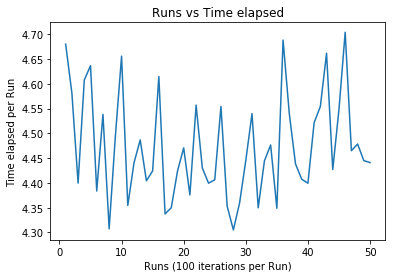

In [0]:
plt.plot([x for x in range(1,run+1)],[per_run_time[x] for x in range(len(per_run_time))])
plt.title("Runs vs Time elapsed")
plt.xlabel("Runs (100 iterations per Run)")
plt.ylabel("Time elapsed per Run")
plt.savefig('time-50-runs-standard-elitism.pdf')

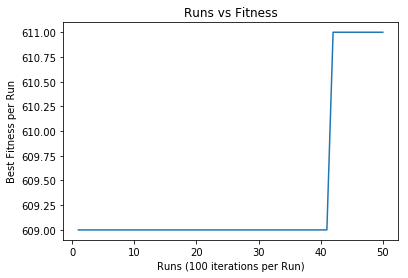

In [0]:
plt.plot([x for x in range(1,run+1)],[best_out_of_runs_fitness[x] for x in range(len(best_out_of_runs_fitness))])
plt.title("Runs vs Fitness")
plt.xlabel("Runs (100 iterations per Run)")
plt.ylabel("Best Fitness per Run")
plt.savefig('best-fitess-runs-standard-elitism.pdf')

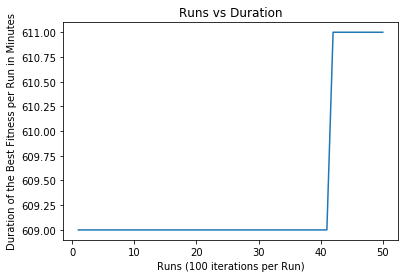

In [0]:
plt.plot([x for x in range(1,run+1)],[best_out_of_runs_duration[x] for x in range(len(best_out_of_runs_duration))])
plt.title("Runs vs Duration")
plt.xlabel("Runs (100 iterations per Run)")
plt.ylabel("Duration of the Best Fitness per Run in Minutes")
plt.savefig('best-duration-runs-standard-elitism.pdf')

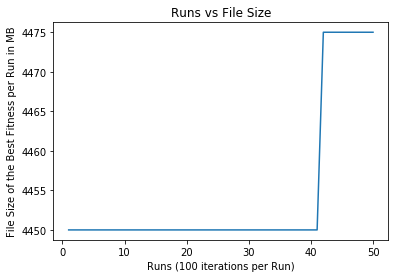

In [0]:
plt.plot([x for x in range(1,run+1)],[best_out_of_runs_size[x] for x in range(len(best_out_of_runs_size))])
plt.title("Runs vs File Size")
plt.xlabel("Runs (100 iterations per Run)")
plt.ylabel("File Size of the Best Fitness per Run in MB")
plt.savefig('best-size-runs-standard-elitism.pdf')

In [0]:
highest_fitness_index = best_out_of_runs_fitness.index(max(best_out_of_runs_fitness))
opt_duration = best_out_of_runs_duration[highest_fitness_index]
opt_size = best_out_of_runs_size[highest_fitness_index]

In [0]:
print("Optimum Duration : " + str(opt_duration))
print("Optimum Size : " + str(opt_size))

Optimum Duration : 611
Optimum Size : 4475


### **Plotting the Final Result**

This plot shows 3 import facts about the final solution. 


1.   The Horizontal Line shows the 4,500MB benchmark line
2.   The Zig Zag plot shows the Fitness of the Final Population
3. The Red Cross (+) shows the position of the Optimum solution Generated





Text(0.5, 1.0, 'Chromosome in the Evolved Population vs File Size')

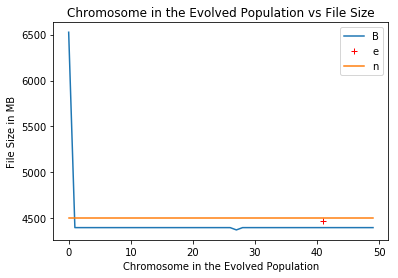

In [0]:
plt.plot([x for x in range(popSize)],[finalSize[x] for x in range(len(finalSize))])
plt.legend("Evolved Generation")
plt.plot([Best_Solution_id],[Best_Solution_Size],'r+')
plt.legend("Optimum Solution")
plt.plot([x for x in range(popSize)],[4500 for x in range(len(finalSize))])
plt.legend("Benchmark")
plt.xlabel("Chromosome in the Evolved Population")
plt.ylabel("File Size in MB")
plt.title("Chromosome in the Evolved Population vs File Size")


### **Variation with  Iteration Count**

In [0]:
def get_avg_best(n,pop_1):
  for j in range(1,n+1):
    finalFitness = []
    finalDuration = []
    finalSize = []
    
    #standard values
    n_point = 1
    p_c = 0.8
    p_m = 0.01
    
    for i in range(1):
      trainModel(j,n_point,p_c,p_m)

      
      for i in range(popSize):
        fitness, duration,size = getFitness_for_runs(pop_1.iloc[i,1:].values)
        finalFitness.append(fitness)
        finalDuration.append(duration)
        finalSize.append(size)
    
    highest_fit_id = finalFitness.index(max(finalFitness))
    
    best_vals_size.append(finalSize[highest_fit_id])
    best_vals_duration.append(finalDuration[highest_fit_id])
    best_vals_fitness.append(finalFitness[highest_fit_id])
    
    print("Completed : " + str(j))
    pop_1 = chromosome

In [0]:
chromosome = createInitPop(popSize)

In [43]:

pop_1 = chromosome
#save the best chromosome fitness per iteration
best_vals_size = [ ]
best_vals_duration = [ ]
best_vals_fitness = [ ]
n=100
get_avg_best(n,pop_1)


Completed : 1
Completed : 2
Completed : 3
Completed : 4
Completed : 5
Completed : 6
Completed : 7
Completed : 8
Completed : 9
Completed : 10
Completed : 11
Completed : 12
Completed : 13
Completed : 14
Completed : 15
Completed : 16
Completed : 17
Completed : 18
Completed : 19
Completed : 20
Completed : 21
Completed : 22
Completed : 23
Completed : 24
Completed : 25
Completed : 26
Completed : 27
Completed : 28
Completed : 29
Completed : 30
Completed : 31
Completed : 32
Completed : 33
Completed : 34
Completed : 35
Completed : 36
Completed : 37
Completed : 38
Completed : 39
Completed : 40
Completed : 41
Completed : 42
Completed : 43
Completed : 44
Completed : 45
Completed : 46
Completed : 47
Completed : 48
Completed : 49
Completed : 50
Completed : 51
Completed : 52
Completed : 53
Completed : 54
Completed : 55
Completed : 56
Completed : 57
Completed : 58
Completed : 59
Completed : 60
Completed : 61
Completed : 62
Completed : 63
Completed : 64
Completed : 65
Completed : 66
Completed : 67
Comp

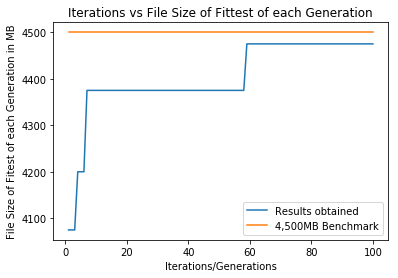

In [47]:
plt.plot([x for x in range(1,n+1)],best_vals_size)
plt.plot([x for x in range(1,n+1)],[4500 for x in range(1,n+1)])
plt.title("Iterations vs File Size of Fittest of each Generation")
plt.xlabel("Iterations/Generations")
plt.ylabel("File Size of Fitest of each Generation in MB")
plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('iterations-size.pdf')

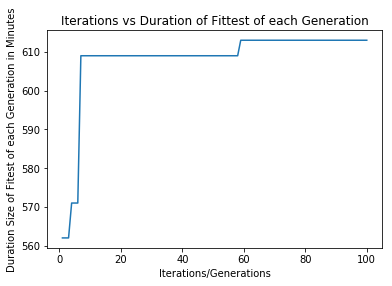

In [48]:
plt.plot([x for x in range(1,n+1)],best_vals_duration)
plt.title("Iterations vs Duration of Fittest of each Generation")
plt.xlabel("Iterations/Generations")
plt.ylabel("Duration Size of Fitest of each Generation in Minutes")
plt.savefig('iterations-duration.pdf')


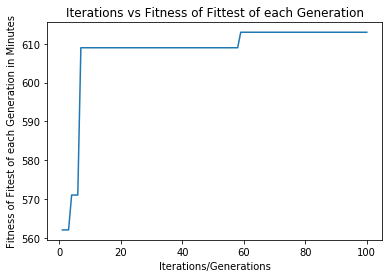

In [50]:
plt.plot([x for x in range(1,n+1)],best_vals_fitness)
plt.title("Iterations vs Fitness of Fittest of each Generation")
plt.xlabel("Iterations/Generations")
plt.ylabel("Fitness of Fitest of each Generation in Minutes")
plt.savefig('iterations-fitness.pdf')


In [0]:
import statistics as st

In [61]:
print('Average Size of Fittest :' + str(st.mean(best_vals_size)) + 'MB')
print('Average Duration of Fittest :' + str(st.mean(best_vals_duration)) + ' minutes')
print('Average Fitness of Fittest :' + str(st.mean(best_vals_fitness)))

Average Size of Fittest :4402MB
Average Duration of Fittest :608 minutes
Average Fitness of Fittest :608


### **Variation with Crossover Rate** 

In [0]:
def get_avg_best_pc_var(start,end,step,pop_1):
  epoch = 1
  
  n_point = 1
  p_m = 0.01
  
  for j in frange(start,end,step):
    finalFitness = []
    finalDuration = []
    finalSize = []
    for k in range(10):
      
      trainModel(iteration_pc+1,n_point,j,p_m)
    
      
      for i in range(popSize):
        fitness, duration,size = getFitness_for_runs(pop_1.iloc[i,1:].values)
        finalFitness.append(fitness)
        finalDuration.append(duration)
        finalSize.append(size)
        
    id = finalFitness.index(max(finalFitness))
    best_vals_size.append(finalSize[id])
    best_vals_duration.append(finalDuration[id])
    best_vals_fitness.append(finalFitness[id])
    
    print("Completed : " + str(epoch) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    pop_1 = chromosome
    epoch +=1

In [0]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

In [0]:
chromosome = createInitPop(popSize)
pop_1 = chromosome


In [113]:
best_vals_size = [ ]
best_vals_duration = [ ]
best_vals_fitness = [ ]
iteration_pc = 10
start =0
end = 1
step = 0.01
get_avg_best_pc_var(start,end,step,pop_1)

Completed : 1 Best Size :8025 Best Duration : 1017
Completed : 2 Best Size :5675 Best Duration : 782
Completed : 3 Best Size :5725 Best Duration : 787
Completed : 4 Best Size :5825 Best Duration : 791
Completed : 5 Best Size :5725 Best Duration : 787
Completed : 6 Best Size :5675 Best Duration : 709
Completed : 7 Best Size :6475 Best Duration : 819
Completed : 8 Best Size :5500 Best Duration : 744
Completed : 9 Best Size :5950 Best Duration : 729
Completed : 10 Best Size :5775 Best Duration : 781
Completed : 11 Best Size :6575 Best Duration : 819
Completed : 12 Best Size :5675 Best Duration : 777
Completed : 13 Best Size :4825 Best Duration : 651
Completed : 14 Best Size :6075 Best Duration : 757
Completed : 15 Best Size :7275 Best Duration : 901
Completed : 16 Best Size :6225 Best Duration : 766
Completed : 17 Best Size :5975 Best Duration : 824
Completed : 18 Best Size :6575 Best Duration : 902
Completed : 19 Best Size :5525 Best Duration : 767
Completed : 20 Best Size :5975 Best Dur

In [0]:
best_vals_duration

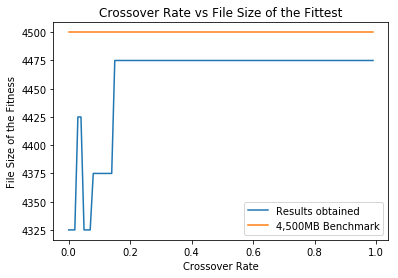

In [114]:
plt.plot([x for x in frange(start,end,step)],best_vals_size)
plt.plot([x for x in frange(start,end,step)],[4500 for x in frange(start,end,step)])
plt.title("Crossover Rate vs File Size of the Fittest")
plt.xlabel("Crossover Rate")
plt.ylabel("File Size of the Fitness")
plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('cr-size.pdf')

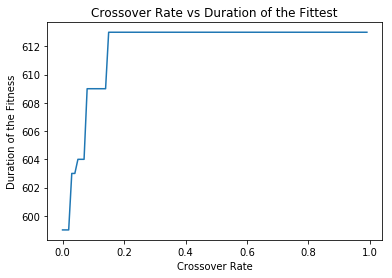

In [115]:
plt.plot([x for x in frange(start,end,step)],best_vals_duration)
plt.title("Crossover Rate vs Duration of the Fittest")
plt.xlabel("Crossover Rate")
plt.ylabel("Duration of the Fitness")
#plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('cr-duration.pdf')

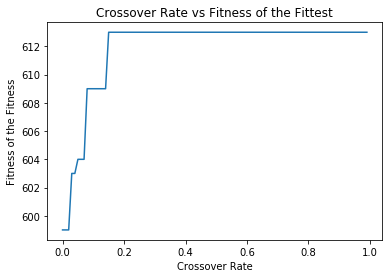

In [116]:
plt.plot([x for x in frange(start,end,step)],best_vals_fitness)
plt.title("Crossover Rate vs Fitness of the Fittest")
plt.xlabel("Crossover Rate")
plt.ylabel("Fitness of the Fitness")
#plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('cr-fitness.pdf')

In [117]:
print('Average Size of Fittest :' + str(st.mean(best_vals_size)) + 'MB')
print('Average Duration of Fittest :' + str(st.mean(best_vals_duration)) + ' minutes')
print('Average Fitness of Fittest :' + str(st.mean(best_vals_fitness)))

Average Size of Fittest :4458MB
Average Duration of Fittest :611 minutes
Average Fitness of Fittest :611


### **Variation with Mutation Rate**

In [0]:
def get_avg_best_pm_var(start,end,step,pop_1):
  epoch = 1
  n_point = 1
  p_c = 0.8
  for j in frange(start,end,step):
    trainModel(iteration_pm+1,n_point,p_c,j)
    
    finalDuration = []
    finalSize = []
    finalFitness = []
    for i in range(popSize):
      fitness, duration,size = getFitness_for_runs(pop_1.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      finalFitness.append(fitness)
      
    best_fitness_id = finalFitness.index(max(finalFitness))  
    best_vals_size.append(finalSize[best_fitness_id])
    best_vals_duration.append(finalDuration[best_fitness_id])
    best_vals_fitness.append(finalFitness[best_fitness_id])
    print("Completed : " + str(epoch) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    pop_1 = chromosome
    epoch +=1

In [0]:
chromosome = createInitPop(popSize)
pop_1 = chromosome

In [121]:
best_vals_size = [ ]
best_vals_duration = [ ]
best_vals_fitness = [ ]
iteration_pm = 10
start =0
end = 1
step = 0.01
get_avg_best_pm_var(start,end,step,pop_1)

Completed : 1 Best Size :7725 Best Duration : 982
Completed : 2 Best Size :7725 Best Duration : 982
Completed : 3 Best Size :7725 Best Duration : 982
Completed : 4 Best Size :4350 Best Duration : 596
Completed : 5 Best Size :5725 Best Duration : 691
Completed : 6 Best Size :5550 Best Duration : 658
Completed : 7 Best Size :4350 Best Duration : 596
Completed : 8 Best Size :4325 Best Duration : 599
Completed : 9 Best Size :6450 Best Duration : 794
Completed : 10 Best Size :4675 Best Duration : 642
Completed : 11 Best Size :5275 Best Duration : 649
Completed : 12 Best Size :5125 Best Duration : 629
Completed : 13 Best Size :5400 Best Duration : 648
Completed : 14 Best Size :4400 Best Duration : 606
Completed : 15 Best Size :6350 Best Duration : 781
Completed : 16 Best Size :4400 Best Duration : 606
Completed : 17 Best Size :4425 Best Duration : 614
Completed : 18 Best Size :4425 Best Duration : 614
Completed : 19 Best Size :5175 Best Duration : 634
Completed : 20 Best Size :4425 Best Dura

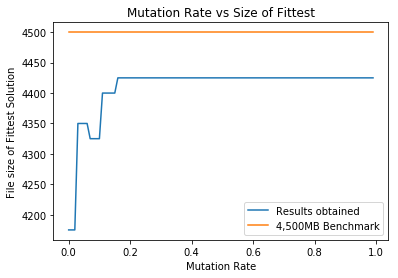

In [126]:
plt.plot([x for x in frange(start,end,step)],best_vals_size)
plt.plot([x for x in frange(start,end,step)],[4500 for x in frange(start,end,step)])
plt.title("Mutation Rate vs Size of Fittest")
plt.xlabel("Mutation Rate")
plt.ylabel("File size of Fittest Solution")
plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('mr-size.pdf')

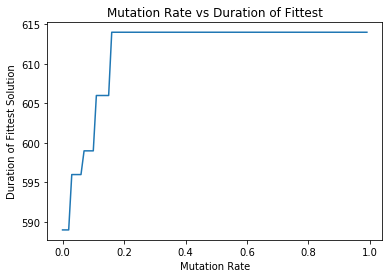

In [127]:
plt.plot([x for x in frange(start,end,step)],best_vals_duration)
plt.title("Mutation Rate vs Duration of Fittest")
plt.xlabel("Mutation Rate")
plt.ylabel("Duration of Fittest Solution")
plt.savefig('mr-duration.pdf')

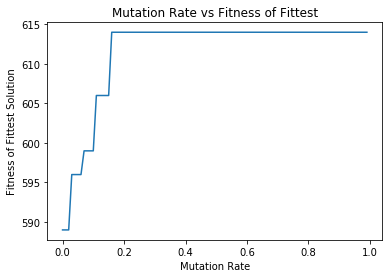

In [128]:
plt.plot([x for x in frange(start,end,step)],best_vals_fitness)
plt.title("Mutation Rate vs Fitness of Fittest")
plt.xlabel("Mutation Rate")
plt.ylabel("Fitness of Fittest Solution")
plt.savefig('mr-fitness.pdf')

In [129]:
print('Average Size of Fittest :' + str(st.mean(best_vals_size)) + 'MB')
print('Average Duration of Fittest :' + str(st.mean(best_vals_duration)) + ' minutes')
print('Average Fitness of Fittest :' + str(st.mean(best_vals_fitness)))

Average Size of Fittest :4409MB
Average Duration of Fittest :611 minutes
Average Fitness of Fittest :611


### **Variation with Population size**

In [0]:
def pop_var(popSize):
  epoch = 1
  for j in range(1,popSize+1):
    chromosome = createInitPop(j)
    #n point for crossover
    n_point = 1
    #crossover rate
    p_c = 0.8
    #mutation rate
    p_m = 0.01

    finalDuration = []
    finalSize = []
    finalFitness = []
    trainModel(100,n_point,p_c,p_m)
    
    #Get Fitness and Size information for the Last Population
    for i in range(j):
      fitness, duration,size = getFitness_for_runs(pop_1.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      finalFitness.append(fitness)
      
    best_fitness_id = finalFitness.index(max(finalFitness))  
    best_vals_size.append(finalSize[best_fitness_id])
    best_vals_duration.append(finalDuration[best_fitness_id])
    best_vals_fitness.append(finalFitness[best_fitness_id])
      
    print("Completed : " + str(epoch) + " Pop Size : " + str(j) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    epoch += 1
    
    

In [95]:
#Final population Duration and Size storage
best_vals_size = [ ]
best_vals_duration = [ ]
best_vals_fitness = [ ]

popSize = 50
pop_var(popSize)

Completed : 1 Pop Size : 1 Best Size :4350 Best Duration : 503
Completed : 2 Pop Size : 2 Best Size :4425 Best Duration : 614
Completed : 3 Pop Size : 3 Best Size :4425 Best Duration : 614
Completed : 4 Pop Size : 4 Best Size :4425 Best Duration : 614
Completed : 5 Pop Size : 5 Best Size :4425 Best Duration : 614
Completed : 6 Pop Size : 6 Best Size :4425 Best Duration : 614
Completed : 7 Pop Size : 7 Best Size :4425 Best Duration : 614
Completed : 8 Pop Size : 8 Best Size :4425 Best Duration : 614
Completed : 9 Pop Size : 9 Best Size :4425 Best Duration : 614
Completed : 10 Pop Size : 10 Best Size :4425 Best Duration : 614
Completed : 11 Pop Size : 11 Best Size :4425 Best Duration : 614
Completed : 12 Pop Size : 12 Best Size :4425 Best Duration : 614
Completed : 13 Pop Size : 13 Best Size :4425 Best Duration : 614
Completed : 14 Pop Size : 14 Best Size :4425 Best Duration : 614
Completed : 15 Pop Size : 15 Best Size :4425 Best Duration : 614
Completed : 16 Pop Size : 16 Best Size :442

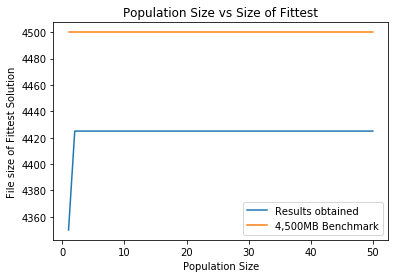

In [102]:
plt.plot([x for x in range(1,popSize+1)],best_vals_size)
plt.plot([x for x in range(1,popSize+1)],[4500 for i in range(1,popSize+1)])
plt.title("Population Size vs Size of Fittest")
plt.xlabel("Population Size")
plt.ylabel("File size of Fittest Solution")
plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('popsize-size.pdf')

In [100]:
best_vals_size[len(best_vals_size)-1]

4425

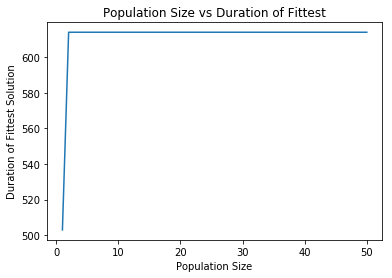

In [103]:
plt.plot([x for x in range(1,popSize+1)],best_vals_duration)
plt.title("Population Size vs Duration of Fittest")
plt.xlabel("Population Size")
plt.ylabel("Duration of Fittest Solution")
#plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('popsize-duration.pdf')

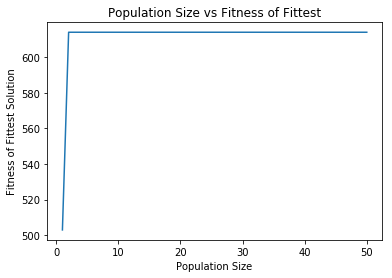

In [107]:
plt.plot([x for x in range(1,popSize+1)],best_vals_fitness)
plt.title("Population Size vs Fitness of Fittest")
plt.xlabel("Population Size")
plt.ylabel("Fitness of Fittest Solution")
#plt.legend(['Results obtained','4,500MB Benchmark'])
plt.savefig('popsize-fitness.pdf')

In [109]:
print('Average Size of Fittest :' + str(st.mean(best_vals_size)) + 'MB')
print('Average Duration of Fittest :' + str(st.mean(best_vals_duration)) + ' minutes')
print('Average Fitness of Fittest :' + str(st.mean(best_vals_fitness)))

Average Size of Fittest :4423MB
Average Duration of Fittest :611 minutes
Average Fitness of Fittest :611


### **Brute Force**

In [0]:
def generate(variables,power):
  val = int((2**variables)/(2**(power+1)))
  file_10 = []
  for i in range(val):
    for j in range(2**power):
      file_10.append(0)

    for j in range(2**power):
      file_10.append(1)
      
  return file_10
  

In [0]:
list_ret = []
variables = 10
for power in range(variables-1,-1,-1):
  list_ret.append(generate(variables,power))

In [0]:
values ={
    
    'file ' + str(x+1):list_ret[x] for x in range(variables-1,-1,-1)
    
    
    
  }
  #convert the array of population to a dataframe
values = pd.DataFrame(values)

In [0]:
values

,file 10,file 9,file 8,file 7,file 6,file 5,file 4,file 3,file 2,file 1
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0
6,0,1,1,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0


In [0]:
def details(row):
  duration = 0
  size = 0
  fitness = 0
  for i in range(len(row)):
    if(row[i] == 1):
      size += df.loc[9-i,'size']
      duration += df.loc[9-i,'duration']
    
    if(size<=4500):
      fitness += duration
    else:
      fitness += duration*0.5
  
  return duration,size,fitness

In [0]:
final_duration = []
final_fitness = []
final_size = []
for i in range(1024):
  
  duration,size,fitness = details(values.iloc[i].values)
  final_duration.append(duration)
  final_size.append(size)
  final_fitness.append(fitness) 

In [0]:
nearst = 0
index = -1
for i in range(1024):
  if(final_size[i] > nearst and final_size[i] <=4500):
    nearst = final_size[i]
    index = i

In [0]:
final_size[index]

4500

In [0]:
final_duration[index]

523

In [0]:
index

361

In [0]:
final_fitness[index]

3090

In [0]:
values.iloc[index]

file 10    1
file 9     0
file 8     0
file 7     1
file 6     0
file 5     1
file 4     1
file 3     0
file 2     1
file 1     0
Name: 361, dtype: int64

### **Differential Evolution**

In [0]:
def mutate():
  #Get 4 distinct values
  state = True
  a = 0
  b = 0
  c = 0
  target_id = 0
  scaleFactor = 0.5
  while(state):
    a = np.random.randint(0,popSize)
    b = np.random.randint(0,popSize)
    c = np.random.randint(0,popSize)
    target_id = np.random.randint(0,popSize)
    state = checkDistinct(a,b,c,target_id)
    #print("a:" +str(a) +" b :"+str(b) +" c:" + str(c) +" target id:" +str(target_id) )
  #Get the respective solution items as arrays
  a_item = population.iloc[a,1:].values
  b_item = population.iloc[b,1:].values
  c_item = population.iloc[c,1:].values
  target_item = population.iloc[target_id,1:].values
  #Add the weighted difference
  for i in range(2):
    a_item[i] = a_item[i] + scaleFactor*(b_item[i]-c_item[i])
    
  return a_item, target_item,target_id

In [0]:
def crossover(donor,target):
  #crossover rate
  CR = 0.1
  
  #size of the arrays
  size = len(donor)
  
  #trial vector
  trial_vector = np.empty([size])
  
  #create an array with random values
  random_array = [random.uniform(0,1) for x in range(size)]
  for i in range(size):
    if(random_array[i] <=CR or i == random.randint(1,size)):
      #replace with donor
      trial_vector[i] = donor[i]
    else:
      #replace with target
      trial_vector[i] = target[i]
  
  return trial_vector

In [0]:
def checkDistinct(a,b,c,d):
  if(a != b != c !=d != a != c and b != d ):
    return False
  else:
    return True

In [0]:
def selection(trial_vector,target):
  fitness_trial,size_trial = getFitness(trial_vector)
  fitness_target,size_target = getFitness(trial_vector)
  
  
  if(fitness_trial>fitness_target):
    target = trial_vector
  else : 
    target = target
  
  return target

In [0]:
def replace_to_population(offspring,target_id):
  population.iloc[target_id,1:] = offspring

In [0]:
def iterate(n):
  #value = ackley_function(solution[0],solution[1])
  for i in range(n):
    donor, target,target_id = mutate()
    trial_vector = crossover(donor,target)
    offspring = selection(trial_vector,target)
    replace_to_population(offspring,target_id)

In [0]:
def details2(row):
  duration = 0
  size = 0
  fitness = 0
  for i in range(len(row)):
    if(row[i] == 1):
      size += df.loc[i,'size']
      duration += df.loc[i,'duration']
    
    if(size<=4500):
      fitness += duration
    else:
      fitness += duration*0.5
  
  return duration,size,fitness

In [0]:
popSize = 50
population = createInitPop(popSize)

In [0]:
iterations = 100
iterate(100)

In [0]:
finalDuration = []
finalFitness = []
finalSize = []
#Get Fitness and Size information for the Last Population
for i in range(popSize):
  duration,size,fitness = details2(population.iloc[i,1:].values)
  finalDuration.append(duration)
  finalFitness.append(fitness)
  finalSize.append(size)

In [0]:
# nearst = 0
# index = -1
# for i in range(popSize):
#   if(finalFitness[i] > nearst and finalSize[i] <=4500):
#     nearst = final_size[i]
#     index = i

In [160]:
id = finalFitness.index(max(finalFitness))
finalFitness[id]

3678

In [161]:
finalSize[id]

3950

In [162]:
finalDuration[id]

549

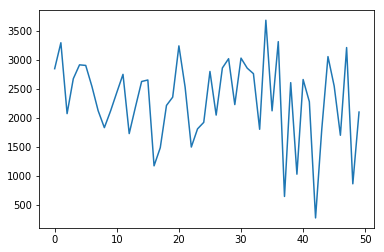

In [165]:
plt.plot([x for x in range(popSize)],finalFitness)

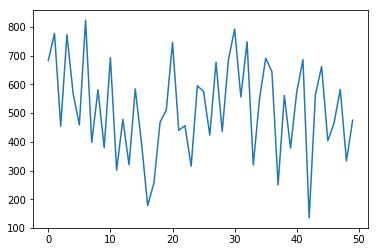

In [166]:
plt.plot([x for x in range(popSize)],finalDuration)

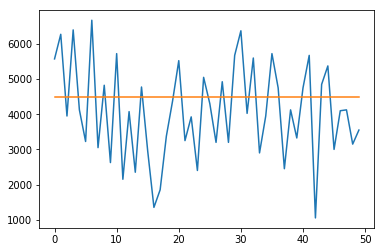

In [167]:
plt.plot([x for x in range(popSize)],finalSize)
plt.plot([x for x in range(popSize)],[4500 for x in range(popSize)])

